In [321]:
#importing required libraries
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from sklearn.model_selection import train_test_split
import ast

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
import tensorflow.keras as keras
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Input, Embedding, Add, Dot, Flatten,Reshape, Lambda
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import model_to_dot
from keras.layers.embeddings import Embedding

from IPython.display import SVG
from operator import itemgetter
from sklearn.decomposition import PCA
%matplotlib inline

2.8.0


In [9]:
#loading json files to data frame

# Checkin data
# data_file1 = open("yelp_academic_dataset_checkin.json",encoding="utf-8")
# data_1 = []
# for line in data_file1:
#     data_1.append(json.loads(line))
# checkin_df = pd.DataFrame(data_1)
# data_file1.close()

# Business Data
data_file2 = open("yelp_academic_dataset_business.json", encoding="utf-8")
data_2 = []
for line in data_file2:
    data_2.append(json.loads(line))
business_df = pd.DataFrame(data_2)
data_file2.close()

# Tip Data
data_file3 = open("yelp_academic_dataset_tip.json", encoding="utf-8")
data_3 = []
for line in data_file3:
    data_3.append(json.loads(line))
tip_df = pd.DataFrame(data_3)
data_file3.close()

# User Data
data_file4 = open("yelp_academic_dataset_user.json", encoding="utf-8")
data_4 = []
for line in data_file4:
    data_4.append(json.loads(line))
user_df = pd.DataFrame(data_4)
data_file4.close()

# Review Data
data_file5 = open("yelp_academic_dataset_review.json", encoding="utf-8")
data_5 = []
for line in data_file5:
    data_5.append(json.loads(line))
review_df = pd.DataFrame(data_5)
data_file5.close()

# print("All files loaded successfully!")

### Let's have a look at all the dataset and shape of each dataframe

In [25]:
# shape of each data set
print('{} :{}'.format("shape of Business dataset is",business_df.shape))
print('{}  :{}'.format("shape of Checkin dataset is",checkin_df.shape))
print('{}      :{}'.format("shape of Tip dataset is",tip_df.shape))
print('{}     :{}'.format("shape of User dataset is",user_df.shape))
print('{}   :{}'.format("shape of Review dataset is",review_df.shape))

shape of Business dataset is :(160585, 14)
shape of Checkin dataset is  :(138876, 2)
shape of Tip dataset is      :(1162119, 5)
shape of User dataset is     :(2189457, 22)
shape of Review dataset is   :(8635403, 9)


#### Now we will look at each dataset and will try to allocate optimal data types for better performance and space optimization

In [33]:
business_df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."


In [196]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   160585 non-null  object 
 1   name          160585 non-null  object 
 2   address       160585 non-null  object 
 3   city          160585 non-null  object 
 4   state         160585 non-null  object 
 5   postal_code   160585 non-null  object 
 6   latitude      160585 non-null  float32
 7   longitude     160585 non-null  float32
 8   stars         160585 non-null  float16
 9   review_count  160585 non-null  int16  
 10  is_open       160585 non-null  int8   
 11  attributes    145593 non-null  object 
 12  categories    160470 non-null  object 
 13  hours         133244 non-null  object 
dtypes: float16(1), float32(2), int16(1), int8(1), object(9)
memory usage: 13.0+ MB


In [28]:
business_df.describe()

,latitude,longitude,stars,review_count,is_open
count,160585.000000,160585.000000,160585.000000,160585.000000,160585.000000
mean,38.314220,-93.820432,3.424106,51.964548,0.767494
std,7.186416,19.881239,0.994027,130.030448,0.422431
min,27.000000,-123.000000,1.000000,5.000000,0.000000
25%,30.000000,-122.000000,3.000000,8.000000,1.000000
50%,42.000000,-84.000000,4.000000,17.000000,1.000000
75%,45.000000,-81.000000,4.000000,44.000000,1.000000
max,49.000000,71.000000,5.000000,9185.000000,1.000000


In [195]:
#converting datatypes
business_df["is_open"]=business_df["is_open"].astype(np.int8)
business_df["stars"]=business_df["stars"].astype(np.float16)
business_df["review_count"]=business_df["review_count"].astype(np.int16)
business_df["latitude"]=business_df["latitude"].astype(np.float32)
business_df["longitude"]=business_df["longitude"].astype(np.float32)

In [83]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8635403 entries, 0 to 8635402
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int8          
 4   useful       int16         
 5   funny        int16         
 6   cool         int16         
 7   date         datetime64[ns]
dtypes: datetime64[ns](1), int16(3), int8(1), object(3)
memory usage: 321.2+ MB


In [35]:
review_df.describe()

,stars,useful,funny,cool
count,8.635403e+06,8.635403e+06,8.635403e+06,8.635403e+06
mean,3.730959e+00,1.249294e+00,4.194358e-01,5.022635e-01
std,1.456809e+00,3.204236e+00,1.869675e+00,2.244378e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,7.580000e+02,6.100000e+02,7.320000e+02


In [38]:
#converting datatypes
review_df["stars"] = review_df["stars"].astype(np.int8)
review_df["useful"] = review_df["useful"].astype(np.int16)
review_df["funny"] = review_df["funny"].astype(np.int16)
review_df["cool"] = review_df["cool"].astype(np.int16)
review_df["date"] = pd.to_datetime(review_df["date"])

In [82]:
#dropping text data
review_df = review_df.drop(columns=["text"])

In [57]:
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162119 entries, 0 to 1162118
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   user_id           1162119 non-null  object
 1   business_id       1162119 non-null  object
 2   text              1162119 non-null  object
 3   date              1162119 non-null  object
 4   compliment_count  1162119 non-null  int8  
dtypes: int8(1), object(4)
memory usage: 36.6+ MB


In [56]:
#converting datatypes
tip_df["compliment_count"] = tip_df["compliment_count"].astype(np.int8)

In [64]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189457 entries, 0 to 2189456
Data columns (total 22 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   user_id             object
 1   name                object
 2   review_count        int16 
 3   yelping_since       object
 4   useful              int32 
 5   funny               int32 
 6   cool                int32 
 7   elite               object
 8   friends             object
 9   fans                int16 
 10  average_stars       int8  
 11  compliment_hot      int16 
 12  compliment_more     int16 
 13  compliment_profile  int16 
 14  compliment_cute     int16 
 15  compliment_list     int16 
 16  compliment_note     int16 
 17  compliment_plain    int32 
 18  compliment_cool     int16 
 19  compliment_funny    int16 
 20  compliment_writer   int16 
 21  compliment_photos   int32 
dtypes: int16(11), int32(5), int8(1), object(5)
memory usage: 173.3+ MB


In [73]:
pd.set_option('display.max_columns',100)

In [74]:
user_df.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,3,1710,163,190,361,147,1212,5691,2541,2541,815,323
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...",1025,4,1632,87,94,232,96,1187,3293,2205,2205,472,294


In [65]:
user_df.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06,2.189457e+06
mean,2.169772e+01,3.805667e+01,1.539468e+01,2.047354e+01,1.379219e+00,3.342690e+00,1.633913e+00,2.736519e-01,1.628577e-01,1.304570e-01,6.127410e-02,1.205501e+00,2.676413e+00,2.472691e+00,2.472691e+00,9.526750e-01,9.881007e-01
std,7.601255e+01,5.352625e+02,3.532697e+02,4.668296e+02,1.686675e+01,1.185590e+00,6.440827e+01,1.199887e+01,1.418780e+01,1.076745e+01,9.473196e+00,3.540149e+01,1.141425e+02,7.843335e+01,7.843335e+01,2.947058e+01,8.743189e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.721400e+04,0.000000e+00,-1.867800e+04,-1.867800e+04,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.500000e+01,1.300000e+01,3.000000e+00,3.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.568600e+04,2.043800e+05,1.720410e+05,1.984510e+05,1.211600e+04,5.000000e+00,2.530400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,1.592400e+04,9.085800e+04,2.998900e+04,2.998900e+04,1.544600e+04,8.263000e+04


In [63]:
#converting datatypes
user_df["average_stars"]=user_df["average_stars"].astype(np.int8)
user_df[["review_count","fans","compliment_hot","compliment_more",
        "compliment_profile","compliment_cute","compliment_list",
        "compliment_note","compliment_cool","compliment_funny",
        "compliment_writer"]]=user_df[["review_count","fans","compliment_hot","compliment_more",
                                        "compliment_profile","compliment_cute","compliment_list",
                                        "compliment_note","compliment_cool","compliment_funny","compliment_writer"]].apply(np.int16)
user_df[["useful","funny","cool",
        "compliment_plain","compliment_photos"]]=user_df[["useful","funny","cool","compliment_plain",
                                                        "compliment_photos"]].apply(np.int32)


Converting to a suitable datatype has reduced the memory usage by more than 50%. It can be optimized even further by using categorical datatype and correctly identifying date type data

Let's save these dataframe for future references

In [66]:
#safing dataframes to csv file
business_df.to_csv("Business_data.csv",index=False)
tip_df.to_csv("Tip_data.csv",index=False)
user_df.to_csv("User_data.csv",index=False)
review_df.to_csv("Review_data.csv",index=False)

In [51]:
# Let's look at cities with top review count
business_df.groupby(['city'])['review_count'].sum().sort_values(ascending=False)

city
Austin                    1374749
Portland                  1111989
Atlanta                    840503
Boston                     734753
Orlando                    647666
                           ...   
North Scituate Village          5
Stoughon                        5
Dell Valley                     5
Driftwood, TX                   5
Collegepark                     5
Name: review_count, Length: 836, dtype: int64

Text(0.5, 1.0, 'Review_Count by Top 10 cities')

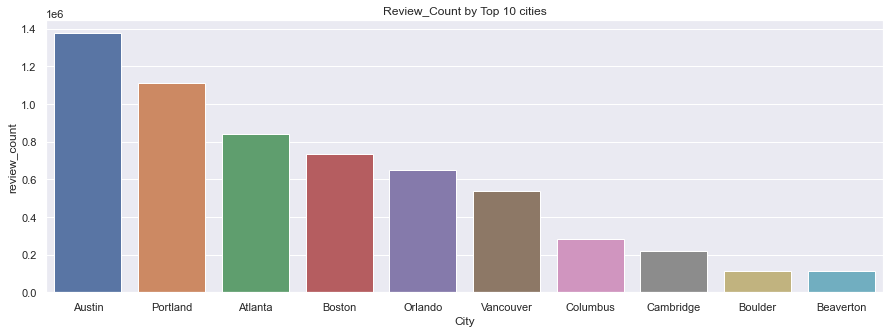

In [170]:
#Let's plot the graph for top 10 cities
df_temp = business_df.groupby(['city'])['review_count'].sum().sort_values(ascending=False)
df_temp = df_temp.iloc[:10]
df_temp = {"City":list(df_temp.index),'review_count':df_temp.values}
sns.set(rc={'figure.figsize':(15,5)})
df_temp = pd.DataFrame(df_temp)
sns.barplot(x='City', y='review_count',data=df_temp).set_title("Review_Count by Top 10 cities")

Austin seems to be the city with maximum reviews, let's build a reccomendation system for these good fellas!

In [198]:
# We will look for first all business data from Austin that are open
aus_open = business_df[(business_df['city'] == 'Austin') & (business_df['is_open'] == 1)]
austin_df = aus_open[['business_id','name','address', 'categories', 'attributes','stars']]
austin_df.head()

,business_id,name,address,categories,attributes,stars
8,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140","Shopping, Jewelry Repair, Appraisal Services, ...","{'RestaurantsPriceRange2': '1', 'ByAppointment...",5.0
24,nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,6505 N Interstate 35,"Hotels, Hotels & Travel, Event Planning & Serv...","{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...",3.0
27,8XyEpVdAO0o6iVkVxkWosQ,PS Property Management Company,"2506 S Lamar Blvd, Ste 2","Home Services, Real Estate, Property Management",{'BusinessAcceptsCreditCards': 'True'},4.5
37,NVfOn7TdnHbaGH97CVB_Qg,McKinley Chiropractic,"5625 Eiger Rd, Ste 160","Chiropractors, Health & Medical","{'BusinessAcceptsCreditCards': 'True', 'Accept...",5.0
39,s8eTWEtW5WcnL2kUxrOVmw,Austin Regional Clinic: ARC Quarry Lake,"4515 Seton Center Pkwy, Ste 220","Diagnostic Services, Doctors, Internal Medicin...","{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...",3.5


As we can see there are multiple business categories in the data. However, we only want Restaurants!

In [199]:
#filtering only Restaraunts
aus_Res_df = austin_df[austin_df['categories'].str.contains('Restaurant.*')==True].reset_index()
aus_Res_df.head()

,index,business_id,name,address,categories,attributes,stars
0,41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Ambience': '{'touristy': False, 'hipster': F...",4.5
1,61,bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,6247 Mcneil Drive,"Fast Food, Restaurants, Burgers","{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...",2.0
2,199,Pk4ZwXwUU50BDn5gqw_rKg,Johnny Carino's,9500 S IH-35 Service Rd,"Italian, Salad, Pizza, Nightlife, Restaurants,...","{'RestaurantsGoodForGroups': 'True', 'Business...",3.0
3,253,Ieelu69Y23nbjKG3OGfwnw,McDonald's,5017 Hwy 290 W,"Restaurants, Coffee & Tea, Food, Burgers, Fast...","{'RestaurantsTakeOut': 'True', 'RestaurantsRes...",1.5
4,258,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,214 W 4th St,"Tex-Mex, Mexican, Tacos, Restaurants","{'RestaurantsTakeOut': 'True', 'OutdoorSeating...",3.5


    Notice that attributes tables have multiple attributes. We need that data to enrich our model with more features.

In [176]:
# Function for extracting keys
def get_keys(features, key):
    if features == None:return "{}"
    if key in features:return features.pop(key)

# converting strings to dictionary
def str_dict(features):
    if features != None:return ast.literal_eval(features)
    else:return ast.literal_eval("{}")  

In [267]:
# extracting attributes
aus_Res_df['BusinessParking'] = aus_Res_df.apply(lambda x: str_dict(get_keys(x['attributes'], 'BusinessParking')), axis=1)
aus_Res_df['Ambience'] = aus_Res_df.apply(lambda x: str_dict(get_keys(x['attributes'], 'Ambience')), axis=1)
aus_Res_df['GoodForMeal'] = aus_Res_df.apply(lambda x: str_dict(get_keys(x['attributes'], 'GoodForMeal')), axis=1)
aus_Res_df['Dietary'] = aus_Res_df.apply(lambda x: str_dict(get_keys(x['attributes'], 'Dietary')), axis=1)
aus_Res_df['Music'] = aus_Res_df.apply(lambda x: str_dict(get_keys(x['attributes'], 'Music')), axis=1)

In [201]:
# create dummy table with attributes
feat_df = pd.concat([aus_Res_df['attributes'].apply(pd.Series),
                     aus_Res_df['BusinessParking'].apply(pd.Series),
                     aus_Res_df['Ambience'].apply(pd.Series),
                     aus_Res_df['GoodForMeal'].apply(pd.Series),
                     aus_Res_df['Dietary'].apply(pd.Series) ], axis=1)
feat_df_dummy = pd.get_dummies(feat_df)
feat_df_dummy.head()

,CoatCheck_False,CoatCheck_True,GoodForDancing_False,GoodForDancing_True,RestaurantsDelivery_False,RestaurantsDelivery_None,RestaurantsDelivery_True,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,RestaurantsPriceRange2_3,RestaurantsPriceRange2_4,RestaurantsPriceRange2_None,Caters_False,Caters_None,Caters_True,RestaurantsTableService_False,RestaurantsTableService_None,RestaurantsTableService_True,RestaurantsReservations_False,RestaurantsReservations_None,RestaurantsReservations_True,HappyHour_False,HappyHour_True,WheelchairAccessible_False,WheelchairAccessible_True,RestaurantsGoodForGroups_False,RestaurantsGoodForGroups_None,RestaurantsGoodForGroups_True,RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_'formal',RestaurantsAttire_None,RestaurantsAttire_u'casual',RestaurantsAttire_u'dressy',RestaurantsAttire_u'formal',BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_True,BikeParking_False,BikeParking_None,BikeParking_True,RestaurantsTakeOut_False,RestaurantsTakeOut_None,RestaurantsTakeOut_True,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_None,Alcohol_u'beer_and_wine',Alcohol_u'full_bar',Alcohol_u'none',...,BYOBCorkage_'yes_free',BYOBCorkage_None,Open24Hours_False,AcceptsInsurance_True,DietaryRestrictions_None,"DietaryRestrictions_{'dairy-free': False, 'gluten-free': False, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}","DietaryRestrictions_{'dairy-free': False, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}","DietaryRestrictions_{'dairy-free': False, 'gluten-free': True, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}","DietaryRestrictions_{'dairy-free': False, 'gluten-free': True, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}",AgesAllowed_u'21plus',garage_False,garage_True,street_False,street_True,validated_False,validated_True,lot_False,lot_True,valet_False,valet_True,touristy_False,touristy_True,hipster_False,hipster_True,romantic_False,romantic_True,divey_False,divey_True,intimate_False,intimate_True,trendy_False,trendy_True,upscale_False,upscale_True,classy_False,classy_True,casual_False,casual_True,dessert_False,dessert_True,latenight_False,latenight_True,lunch_False,lunch_True,dinner_False,dinner_True,brunch_False,brunch_True,breakfast_False,breakfast_True
0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0
3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [202]:
print("shape of one hot encoded feature table:",feat_df_dummy.shape)

shape of one hot encoded feature table: (2840, 198)


In [203]:
# vectorize Category column as well
cat_df_dummy = pd.Series(aus_Res_df['categories']).str.get_dummies(',')
cat_df_dummy.head()

,Acai Bowls,Accessories,Active Life,Adult Entertainment,Afghan,African,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Anesthesiologists,Apartments,Appliances,Appliances & Repair,Arabian,Arcades,Argentine,Art Galleries,Art Museums,Arts & Crafts,Arts & Entertainment,Asian Fusion,Automotive,Axe Throwing,Bagels,Bakeries,Banks & Credit Unions,Barbeque,Barbers,Bars,Bartenders,Basque,Beauty & Spas,Bed & Breakfast,Beer,Beer Bar,Beer Gardens,Boating,Books,Bookstores,Bowling,Brasseries,Brazilian,Breakfast & Brunch,Breweries,Brewing Supplies,Brewpubs,British,Bubble Tea,Buffets,...,Pizza,Poke,Professional Services,Property Management,Public Services & Government,Pubs,Ramen,Real Estate,Resorts,Restaurant Supplies,Restaurants,Salad,Sandwiches,Scandinavian,Seafood,Shopping,Shopping Centers,Singaporean,Smokehouse,Soul Food,Soup,Southern,Spanish,Specialty Food,Sports Bars,Steakhouses,Street Vendors,Sushi Bars,Szechuan,Tacos,Tai Chi,Taiwanese,Tapas Bars,Tapas/Small Plates,Tex-Mex,Thai,Tiki Bars,Tobacco Shops,Turkish,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Waffles,Wedding Planning,Wholesale Stores,Wholesalers,Wine Bars,Wine Tasting Room,Wraps
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [204]:
print("shape of one hot encoded category table:",cat_df_dummy.shape)

shape of one hot encoded category table: (2840, 545)


Text(0.5, 1.0, 'Austing Restaurants Rating Distribution')

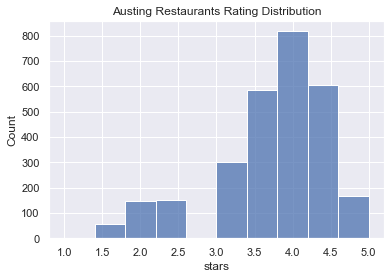

In [211]:
# Let's see the rating of Restaurants from ratings
aus_res_ratings = aus_Res_df[['name','stars']]
sns.histplot(data = aus_res_ratings, x = 'stars', bins=10).set_title("Austing Restaurants Rating Distribution")

In [221]:
df_merged = pd.concat([feat_df_dummy, cat_df_dummy, aus_res_ratings], axis=1)
df_merged.drop('Restaurants',inplace=True,axis=1)
df_merged["stars"] = round(df_merged["stars"]).astype(np.int8)
df_merged.stars.unique()

array([4, 2, 3, 5, 1], dtype=int8)

In [257]:
df_merged.head()

,CoatCheck_False,CoatCheck_True,GoodForDancing_False,GoodForDancing_True,RestaurantsDelivery_False,RestaurantsDelivery_None,RestaurantsDelivery_True,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,RestaurantsPriceRange2_3,RestaurantsPriceRange2_4,RestaurantsPriceRange2_None,Caters_False,Caters_None,Caters_True,RestaurantsTableService_False,RestaurantsTableService_None,RestaurantsTableService_True,RestaurantsReservations_False,RestaurantsReservations_None,RestaurantsReservations_True,HappyHour_False,HappyHour_True,WheelchairAccessible_False,WheelchairAccessible_True,RestaurantsGoodForGroups_False,RestaurantsGoodForGroups_None,RestaurantsGoodForGroups_True,RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_'formal',RestaurantsAttire_None,RestaurantsAttire_u'casual',RestaurantsAttire_u'dressy',RestaurantsAttire_u'formal',BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_True,BikeParking_False,BikeParking_None,BikeParking_True,RestaurantsTakeOut_False,RestaurantsTakeOut_None,RestaurantsTakeOut_True,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_None,Alcohol_u'beer_and_wine',Alcohol_u'full_bar',Alcohol_u'none',...,Poke,Professional Services,Property Management,Public Services & Government,Pubs,Ramen,Real Estate,Resorts,Restaurant Supplies,Salad,Sandwiches,Scandinavian,Seafood,Shopping,Shopping Centers,Singaporean,Smokehouse,Soul Food,Soup,Southern,Spanish,Specialty Food,Sports Bars,Steakhouses,Street Vendors,Sushi Bars,Szechuan,Tacos,Tai Chi,Taiwanese,Tapas Bars,Tapas/Small Plates,Tex-Mex,Thai,Tiki Bars,Tobacco Shops,Turkish,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Waffles,Wedding Planning,Wholesale Stores,Wholesalers,Wine Bars,Wine Tasting Room,Wraps,name,stars
0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Eurasia Sushi Bar & Seafood,4
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wendy's,2
2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Johnny Carino's,3
3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,McDonald's,2
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chispas,4


### Time to train the data

In [229]:
# Putting predictors in X and response variable "stars" in Y
X = df_merged.drop(columns=["stars","name"])
Y = df_merged['stars']

In [230]:
#Splitting Dataset in 80:20 between Train and test and Random state = 0
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Building a KNN model

In [233]:
# Setting n_neighbors = 10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print(f"Traine Score: {train_score}")
print(f"Test Score:   {test_score}")

Traine Score: 0.78125
Test Score:   0.7640845070422535


However, We do not know as of now if the restaurant suggested can belong to other group of restaurants or not. For this we need to look at distance of any given datapoint against all the groups available.

In [236]:
display(df_merged.iloc[10:11])
print("Randomly selected Restaurant is: ", df_merged['name'].values[10])

,CoatCheck_False,CoatCheck_True,GoodForDancing_False,GoodForDancing_True,RestaurantsDelivery_False,RestaurantsDelivery_None,RestaurantsDelivery_True,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,RestaurantsPriceRange2_3,RestaurantsPriceRange2_4,RestaurantsPriceRange2_None,Caters_False,Caters_None,Caters_True,RestaurantsTableService_False,RestaurantsTableService_None,RestaurantsTableService_True,RestaurantsReservations_False,RestaurantsReservations_None,RestaurantsReservations_True,HappyHour_False,HappyHour_True,WheelchairAccessible_False,WheelchairAccessible_True,RestaurantsGoodForGroups_False,RestaurantsGoodForGroups_None,RestaurantsGoodForGroups_True,RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_'formal',RestaurantsAttire_None,RestaurantsAttire_u'casual',RestaurantsAttire_u'dressy',RestaurantsAttire_u'formal',BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_True,BikeParking_False,BikeParking_None,BikeParking_True,RestaurantsTakeOut_False,RestaurantsTakeOut_None,RestaurantsTakeOut_True,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_None,Alcohol_u'beer_and_wine',Alcohol_u'full_bar',Alcohol_u'none',...,Poke,Professional Services,Property Management,Public Services & Government,Pubs,Ramen,Real Estate,Resorts,Restaurant Supplies,Salad,Sandwiches,Scandinavian,Seafood,Shopping,Shopping Centers,Singaporean,Smokehouse,Soul Food,Soup,Southern,Spanish,Specialty Food,Sports Bars,Steakhouses,Street Vendors,Sushi Bars,Szechuan,Tacos,Tai Chi,Taiwanese,Tapas Bars,Tapas/Small Plates,Tex-Mex,Thai,Tiki Bars,Tobacco Shops,Turkish,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Waffles,Wedding Planning,Wholesale Stores,Wholesalers,Wine Bars,Wine Tasting Room,Wraps,name,stars
10,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Halal Bros,4


Randomly selected Restaurant is:  Halal Bros


In [248]:
random_restaurant = df_merged.iloc[10:11,:-2]
X_val =  df_merged.drop(columns=["stars","name"])
y_val = df_merged['stars']
X_val.drop(index=X_val.index[10], 
        axis=0, 
        inplace=True)
y_val.drop(index=y_val.index[10], 
        axis=0, 
        inplace=True)

In [249]:
knn2 = knn.fit(X_val, y_val)

In [254]:
dist, idx =  knn2.kneighbors(random_restaurant)
random_test = pd.DataFrame(knn2.kneighbors(random_restaurant)[0][0], columns = ['dist'])
random_test['idx'] = knn2.kneighbors(random_restaurant)[1][0]
random_test.set_index('idx')

,dist
idx,
831,4.000000
962,4.123106
273,4.242641
2649,4.242641
950,4.358899
648,4.358899
2234,4.358899
1760,4.358899
2269,4.358899


These are the similar Restaurants as our Halal bros. Let's see how close is our prediction in terms of Ratings.

In [301]:
rec_model_1 = random_test.join(df_merged,on='idx')
rec_model_1[['dist','idx','name','stars']].head()

,dist,idx,name,stars
0,4.000000,831,Pho King,3
1,4.123106,962,Marye's Gourmet Pizza,4
2,4.242641,273,Willie's Catering BBQ and Burgers,4
3,4.242641,2649,Quickie Pickie - East Cesar Chavez Street,4
4,4.358899,950,The Hive,4


As we can see Most of the predicted restaurant have similar rating as the Randomly chosen Restaurant. Thus we can say that model is giving a fairly good result. However, We noticed that item based or Content based filtering does not account the user preferences. For this we will explore Collaborative Filtering models.

In [302]:
# Lets get user review in consideration
user_review = review_df[['user_id','business_id','stars', 'date']]
# Selecting the required restaurant details
restaurant_details = aus_Res_df[['business_id', 'name', 'address']]
# merging both dataset on business_id
user_restaurant_review = pd.merge(user_review, restaurant_details, on='business_id')

In [303]:
#Top restaurants in Austin as per User ratings
user_restaurant_review.groupby('business_id')['stars'].count().sort_values(ascending=False).head()

business_id
MGzro82Fi4LYvc86acoONQ    5071
cs6HfZNykLVitm09jWFqWg    4901
bZiIIUcpgxh8mpKMDhdqbA    4818
1Eq16r_MSnvPsnIykBdy9w    3878
YZs1gNSh_sN8JmN_nrpxeA    3603
Name: stars, dtype: int64

In [304]:
print("Most Famous Restaurant as per user rating is:",user_restaurant_review[user_restaurant_review['business_id']=="MGzro82Fi4LYvc86acoONQ"]['name'].unique()[0],
"\n\n","Address:",
      user_restaurant_review[user_restaurant_review['business_id']=="MGzro82Fi4LYvc86acoONQ"]['address'].unique()[0])

Most Famous Restaurant as per user rating is: Franklin Barbecue 

 Address: 900 E 11th St


#### Building a NN

In [315]:
df = user_restaurant_review.copy()
user_encoder = LabelEncoder()

df['user'] = user_encoder.fit_transform(df['user_id'].values)
n_users = df['user'].nunique()

item_encoder = LabelEncoder()

df['business'] = item_encoder.fit_transform(df['business_id'].values)
n_rests = df['business'].nunique()

df['stars'] = df['stars'].values.astype(np.float16)

min_rating = min(df['stars'])
max_rating = max(df['stars'])

In [348]:
# Seperating predictor and response variable
X = df[['user', 'business']].values
y = df['stars'].values
# Splitting the dataset in 80:20 with random state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [349]:
x_train = [X_train[:, 0], X_train[:, 1]]
X_test_val = [X_test[:, 0], X_test[:, 1]]

In [350]:
#Source:Kaggle
class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal', embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        
        return x
    
def Recommender(n_users, n_rests, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    ub = EmbeddingLayer(n_users, 1)(user)
    
    restaurant = Input(shape=(1,))
    m = EmbeddingLayer(n_rests, n_factors)(restaurant)
    mb = EmbeddingLayer(n_rests, 1)(restaurant)   
    
    x = Dot(axes=1)([u, m])
    x = Add()([x, ub, mb])
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)  
    
    model = Model(inputs=[user, restaurant], outputs=x)
    opt = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)  
    
    return model

In [372]:
n_factors = 30
NN = Recommender(n_users, n_rests, n_factors, min_rating, max_rating)
NN.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_24 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_44 (Embedding)       (None, 1, 30)        1862040     ['input_23[0][0]']               
                                                                                                  
 embedding_46 (Embedding)       (None, 1, 30)        9660        ['input_24[0][0]']               
                                                                                           

In [373]:
NN.fit(x=x_train, y=y_train, 
       batch_size=64,
       epochs=5, verbose=1,
       validation_data=(X_test_val, y_test))

Epoch 1/5
1250/1250 [==============================] - 29s 23ms/step - loss: 2.0810 - val_loss: 1.7940
Epoch 2/5
1250/1250 [==============================] - 28s 23ms/step - loss: 1.3126 - val_loss: 1.5873
Epoch 3/5
1250/1250 [==============================] - 29s 23ms/step - loss: 0.5634 - val_loss: 1.5753
Epoch 4/5
1250/1250 [==============================] - 28s 22ms/step - loss: 0.2396 - val_loss: 1.5849
Epoch 5/5
1250/1250 [==============================] - 29s 23ms/step - loss: 0.1508 - val_loss: 1.5813


In [374]:
y_pred = NN.predict(X_test_val)
df_pred = pd.DataFrame(X_test[:,0])
df_pred.rename(columns={0: "user"}, inplace=True)
df_pred['business'] = X_test[:,1]
df_pred['stars'] = y_test
df_pred["predictions"] = y_pred
df_pred.head()

,user,business,stars,predictions
0,44912,212,5.0,3.993559
1,26041,6,4.0,3.638004
2,5780,29,3.0,3.945894
3,18862,43,5.0,4.120004
4,2348,212,4.0,4.797239


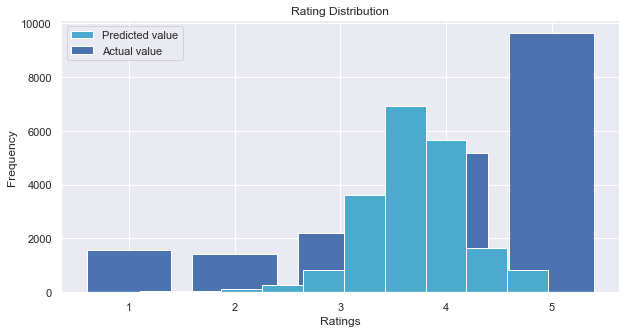

In [378]:
plt.figure(figsize=(10,5))
values, counts = np.unique(df_pred['stars'], return_counts=True)
plt.bar(values, counts, tick_label=['1','2','3','4','5'], label='Actual value')
plt.hist(y_pred, color='#4CAACF', label='Predicted value')
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Rating Distribution")
plt.legend()
plt.show()

In [381]:
# Extract embeddings
embeds = NN.get_layer('embedding_46')
emb_weights = embeds.get_weights()[0]
print("The shape of embedded weights: ", emb_weights.shape)
emb_weights = emb_weights / np.linalg.norm(emb_weights, axis = 1).reshape((-1, 1))


The shape of embedded weights:  (322, 30)


In [383]:
rest_embedding = user_restaurant_review["business_id"].unique()
rest_embedding_df = pd.DataFrame(emb_weights)
rest_embedding_df["business_id"] = rest_embedding
rest_embedding_df = rest_embedding_df.set_index("business_id")
rest_embedding_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
business_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mOnesB4IF9j6-ZmHoOHOig,0.052794,-0.187794,0.115843,-0.254482,0.056712,0.193860,0.138809,0.186715,-0.232436,-0.218345,0.135453,-0.138036,0.275320,0.007725,-0.208206,-0.234633,-0.145482,-0.066464,-0.168697,0.018715,0.159776,-0.157328,0.228040,0.215856,0.287988,-0.172217,0.146673,0.275138,-0.196421,-0.154316
-_GnwXmzC3DXsHR9nyaC2g,-0.054962,-0.288924,-0.117407,-0.208866,-0.244917,-0.248162,0.164394,-0.211162,-0.088184,0.093621,0.146498,0.242565,0.161889,-0.143122,-0.174794,0.175374,-0.166377,-0.032488,-0.165356,0.130452,0.213750,-0.189459,-0.103603,-0.053924,-0.161548,-0.234471,-0.228551,0.215673,0.229055,0.239698
bZiIIUcpgxh8mpKMDhdqbA,0.201456,-0.187273,0.193255,0.189724,0.214904,-0.141109,-0.194882,0.148583,-0.206114,-0.184639,0.232484,0.210731,0.177235,-0.172824,-0.176007,0.100098,-0.230848,0.189379,-0.162896,0.058823,-0.103544,0.186130,-0.206024,-0.217109,0.174511,-0.170105,-0.181163,-0.230304,0.193503,-0.103682
gvpoFnaCq2J7TBXV7yFIkQ,0.226790,-0.130585,-0.162349,-0.200889,0.128683,-0.118323,-0.225371,-0.121609,0.166669,0.206214,-0.145630,0.183045,0.253951,0.104817,-0.148540,0.254528,-0.136177,-0.183805,-0.217826,0.136545,0.098098,-0.259410,-0.233543,0.187815,0.225673,-0.175350,0.176491,0.190254,-0.083546,0.200402
LUCmOKTK5Uh7eU84yJq3mQ,0.195624,0.195550,0.173226,0.206849,-0.214348,-0.181645,-0.183530,0.142965,0.194220,-0.161755,0.201336,-0.127316,0.203940,-0.183757,-0.197132,0.198412,0.180804,-0.127915,0.202341,-0.156523,-0.168761,0.131060,-0.177745,-0.191113,-0.191085,-0.143436,0.217416,0.185217,0.172772,0.215956


In [385]:
user_restaurant_review_unique = user_restaurant_review[['business_id', 'name']].drop_duplicates()
final_df = pd.merge(rest_embedding_df, user_restaurant_review_unique , on='business_id')

In [386]:
final_df.head()

,business_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,name
0,mOnesB4IF9j6-ZmHoOHOig,0.052794,-0.187794,0.115843,-0.254482,0.056712,0.193860,0.138809,0.186715,-0.232436,-0.218345,0.135453,-0.138036,0.275320,0.007725,-0.208206,-0.234633,-0.145482,-0.066464,-0.168697,0.018715,0.159776,-0.157328,0.228040,0.215856,0.287988,-0.172217,0.146673,0.275138,-0.196421,-0.154316,Pho Van
1,-_GnwXmzC3DXsHR9nyaC2g,-0.054962,-0.288924,-0.117407,-0.208866,-0.244917,-0.248162,0.164394,-0.211162,-0.088184,0.093621,0.146498,0.242565,0.161889,-0.143122,-0.174794,0.175374,-0.166377,-0.032488,-0.165356,0.130452,0.213750,-0.189459,-0.103603,-0.053924,-0.161548,-0.234471,-0.228551,0.215673,0.229055,0.239698,Curra's Grill
2,bZiIIUcpgxh8mpKMDhdqbA,0.201456,-0.187273,0.193255,0.189724,0.214904,-0.141109,-0.194882,0.148583,-0.206114,-0.184639,0.232484,0.210731,0.177235,-0.172824,-0.176007,0.100098,-0.230848,0.189379,-0.162896,0.058823,-0.103544,0.186130,-0.206024,-0.217109,0.174511,-0.170105,-0.181163,-0.230304,0.193503,-0.103682,Hopdoddy Burger Bar
3,gvpoFnaCq2J7TBXV7yFIkQ,0.226790,-0.130585,-0.162349,-0.200889,0.128683,-0.118323,-0.225371,-0.121609,0.166669,0.206214,-0.145630,0.183045,0.253951,0.104817,-0.148540,0.254528,-0.136177,-0.183805,-0.217826,0.136545,0.098098,-0.259410,-0.233543,0.187815,0.225673,-0.175350,0.176491,0.190254,-0.083546,0.200402,Velvet Taco Domain
4,LUCmOKTK5Uh7eU84yJq3mQ,0.195624,0.195550,0.173226,0.206849,-0.214348,-0.181645,-0.183530,0.142965,0.194220,-0.161755,0.201336,-0.127316,0.203940,-0.183757,-0.197132,0.198412,0.180804,-0.127915,0.202341,-0.156523,-0.168761,0.131060,-0.177745,-0.191113,-0.191085,-0.143436,0.217416,0.185217,0.172772,0.215956,Snap Kitchen
